In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("features.csv")
df2 = pd.read_csv("stores.csv")
df3 = pd.read_csv("train.csv")

In [3]:
#df1.head()
df1.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [4]:
#df2.head()
df2.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [5]:
df3.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [6]:
df1.shape

(8190, 12)

In [7]:
df2.shape

(45, 3)

In [8]:
df3.shape

(421570, 5)

In [9]:
df2['Store'].value_counts()

1     1
24    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
25    1
23    1
2     1
22    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
45    1
Name: Store, dtype: int64

In [10]:
df = df3.merge(df2, on='Store', how='left')
df = df.merge(df1, on=['Store', 'Date', 'IsHoliday'], how='left')

In [11]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [12]:
df.shape

(421570, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [14]:
df.isnull().sum()/df.shape[0]*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [15]:
df['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: MarkDown1, Length: 2277, dtype: int64

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [18]:
df['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: MarkDown1, Length: 2277, dtype: int64

In [19]:
df=df.drop(['MarkDown2'],axis=1)

In [20]:
df[['MarkDown1','MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1','MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(df[['MarkDown1','MarkDown3', 'MarkDown4', 'MarkDown5']].median())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
dtypes: bool(1), datet

In [22]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [23]:
df['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [24]:
df['Dept'].value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [25]:
df['Weekly_Sales'].value_counts()

10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
1946.71      1
2117.63      1
2184.65      1
2667.10      1
1076.80      1
Name: Weekly_Sales, Length: 359464, dtype: int64

In [26]:
df['Size'].value_counts()

39690     20802
39910     20597
203819    20376
219622    10474
126512    10315
205863    10272
151315    10244
202307    10238
204184    10225
158114    10224
203742    10214
202505    10211
203007    10202
203750    10142
206302    10113
196321    10088
207499    10062
114533    10050
200898    10040
155083    10017
123737     9901
155078     9895
184109     9878
93188      9864
120653     9859
152513     9854
128107     9804
70713      9762
112238     9705
119557     9688
118221     9637
140167     9582
103681     9528
93638      9455
57197      9443
37392      9036
34875      8999
125833     8867
42988      7156
41062      6751
Name: Size, dtype: int64

In [27]:
df['CPI'].value_counts()

129.855533    711
131.108333    708
129.845967    707
130.384903    706
130.645793    706
             ... 
203.831516     45
213.173668     44
207.620696     44
207.495309     44
211.587991     44
Name: CPI, Length: 2145, dtype: int64

In [28]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [29]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [30]:
df.replace({False: 0, True: 1}, inplace=True)

In [31]:
df['IsHoliday'].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [32]:
df['Type'] = pd.factorize(df['Type'])[0]

In [33]:
df['Type'].value_counts()

0    215478
1    163495
2     42597
Name: Type, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
dtypes: datetime64[ns]

In [35]:
df.drop(df[df.Weekly_Sales < 0].index, inplace=True)

In [36]:
Y= df[['Weekly_Sales']]
X = df.drop(['Weekly_Sales'], axis=1)

In [37]:
X.shape

(420285, 14)

In [38]:
df['target'] = Y['Weekly_Sales']

In [39]:
df['target']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: target, Length: 420285, dtype: float64

In [40]:
num=X.select_dtypes(include="number")
Date=X.select_dtypes(include="datetime64[ns]")

In [41]:
cat = num[["Type", "IsHoliday"]]

In [42]:
num

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,0,151315,42.31,2.572,5347.45,24.60,1481.31,3359.45,211.096358,8.106
1,1,1,1,0,151315,38.51,2.548,5347.45,24.60,1481.31,3359.45,211.242170,8.106
2,1,1,0,0,151315,39.93,2.514,5347.45,24.60,1481.31,3359.45,211.289143,8.106
3,1,1,0,0,151315,46.63,2.561,5347.45,24.60,1481.31,3359.45,211.319643,8.106
4,1,1,0,0,151315,46.50,2.625,5347.45,24.60,1481.31,3359.45,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,1,118221,64.88,3.997,4556.61,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,0,1,118221,64.89,3.985,5046.74,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,0,1,118221,54.47,4.000,1956.28,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,0,1,118221,56.47,3.969,2004.02,3.18,437.73,1537.49,192.330854,8.667


In [43]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
Store,420285.0,22.195477,12.787213,1.000,1.000000,3.000000,5.000000,11.000000,13.000000,18.000000,22.000000,26.000000,33.000000,38.000000,40.000000,45.000000,45.000000
Dept,420285.0,44.242771,30.507197,1.000,1.000000,4.000000,7.000000,18.000000,22.000000,29.000000,37.000000,49.000000,74.000000,85.000000,92.000000,98.000000,99.000000
IsHoliday,420285.0,0.070340,0.255720,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Type,420285.0,0.589517,0.666411,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
Size,420285.0,136749.569176,60992.688568,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,112238.000000,120653.000000,140167.000000,155083.000000,202505.000000,203819.000000,204184.000000,219622.000000,219622.000000
Temperature,420285.0,60.090474,18.448260,-2.060,18.300000,27.310000,33.980000,46.680000,50.020000,56.110000,62.090000,67.410000,74.280000,80.380000,83.580000,92.810000,100.140000
Fuel_Price,420285.0,3.360888,0.458523,2.472,2.565000,2.653000,2.720000,2.933000,3.016000,3.236000,3.452000,3.571000,3.738000,3.850000,3.917000,4.202000,4.468000
MarkDown1,420285.0,6026.584056,5040.518517,0.270,58.340000,709.320000,2565.800000,5347.450000,5347.450000,5347.450000,5347.450000,5347.450000,5347.450000,6291.490000,8624.560000,28177.290000,88646.760000
MarkDown3,420285.0,485.371881,5532.198630,-29.100,0.350000,2.700000,7.170000,24.600000,24.600000,24.600000,24.600000,24.600000,24.600000,30.770000,74.410000,2083.280000,141630.610000
MarkDown4,420285.0,2090.599119,3670.481353,0.220,14.330000,273.530000,696.470000,1481.310000,1481.310000,1481.310000,1481.310000,1481.310000,1481.310000,1653.170000,2828.890000,16822.460000,67474.850000


In [44]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [45]:
num=num.apply(lambda x : outlier_cap(x))

In [46]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,85%,90%,99%,max
Store,420285.0,22.205720,12.564635,3.000000,3.000000,3.000000,5.000000,11.000000,22.000000,33.000000,38.000000,40.000000,43.000000,43.000000
Dept,420285.0,44.243697,30.226162,4.000000,4.000000,4.000000,7.000000,18.000000,37.000000,74.000000,85.000000,92.000000,95.000000,95.000000
IsHoliday,420285.0,0.070340,0.255720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Type,420285.0,0.589517,0.666411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000
Size,420285.0,136541.730538,60294.062095,39690.000000,39690.000000,39690.000000,39910.000000,93638.000000,140167.000000,202505.000000,203819.000000,204184.000000,206302.000000,206302.000000
Temperature,420285.0,60.201948,17.569909,27.310000,27.310000,27.310000,33.980000,46.680000,62.090000,74.280000,80.380000,83.580000,87.270000,87.270000
Fuel_Price,420285.0,3.357666,0.443945,2.653000,2.653000,2.653000,2.720000,2.933000,3.452000,3.738000,3.850000,3.917000,4.029000,4.029000
MarkDown1,420285.0,5536.517156,2442.508141,709.320000,709.320000,709.320000,2565.800000,5347.450000,5347.450000,5347.450000,6291.490000,8624.560000,12407.710000,12407.710000
MarkDown3,420285.0,37.751889,48.278217,2.700000,2.700000,2.700000,7.170000,24.600000,24.600000,24.600000,30.770000,74.410000,215.070000,215.070000
MarkDown4,420285.0,1681.512434,1048.911501,273.530000,273.530000,273.530000,696.470000,1481.310000,1481.310000,1481.310000,1653.170000,2828.890000,5163.630000,5163.630000


C:\Users\navne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


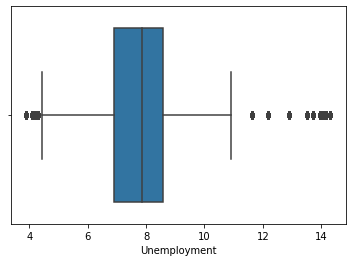

In [47]:
sns.boxplot(df.Unemployment)
plt.show()

In [48]:
num

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.60,1481.31,3359.45,211.096358,8.106
1,3.0,4.0,1,0,151315.0,38.51,2.653,5347.45,24.60,1481.31,3359.45,211.242170,8.106
2,3.0,4.0,0,0,151315.0,39.93,2.653,5347.45,24.60,1481.31,3359.45,211.289143,8.106
3,3.0,4.0,0,0,151315.0,46.63,2.653,5347.45,24.60,1481.31,3359.45,211.319643,8.106
4,3.0,4.0,0,0,151315.0,46.50,2.653,5347.45,24.60,1481.31,3359.45,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,43.0,95.0,0,1,118221.0,64.88,3.997,4556.61,2.70,1601.01,3288.25,192.013558,8.684
421566,43.0,95.0,0,1,118221.0,64.89,3.985,5046.74,18.82,2253.43,2340.01,192.170412,8.667
421567,43.0,95.0,0,1,118221.0,54.47,4.000,1956.28,7.89,599.32,3990.54,192.327265,8.667
421568,43.0,95.0,0,1,118221.0,56.47,3.969,2004.02,3.18,437.73,1537.49,192.330854,8.667


In [49]:
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [50]:
# Divide date column into month, year and weekly we have

num['Date'] = pd.to_datetime(Date['Date'])
num['Year'] = Date.Date.dt.year
num['Month'] = Date.Date.dt.month
num['Day'] = Date.Date.dt.day
num['Week_Number'] = Date.Date.dt.isocalendar().week
num['Quarter'] = Date['Date'].dt.quarter
num['Season'] = (Date['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)


In [51]:
num=num.sort_values(by=['Store', 'Dept', 'Year', 'Week_Number'], ascending=True)

In [52]:
num

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date,Year,Month,Day,Week_Number,Quarter,Season
0,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010-02-05,2010,2,5,5,1,Winter
143,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010-02-05,2010,2,5,5,1,Winter
286,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010-02-05,2010,2,5,5,1,Winter
429,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010-02-05,2010,2,5,5,1,Winter
10244,3.0,4.0,0,0,202307.0,40.19,2.653,5347.45,24.6,1481.31,3359.45,210.752605,8.324,2010-02-05,2010,2,5,5,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411787,43.0,95.0,0,2,39910.0,46.97,3.755,709.32,2.7,1481.31,1288.81,131.193097,5.326,2012-10-26,2012,10,26,43,4,Spring
411930,43.0,95.0,0,2,39910.0,46.97,3.755,709.32,2.7,1481.31,1288.81,131.193097,5.326,2012-10-26,2012,10,26,43,4,Spring
421289,43.0,95.0,0,1,118221.0,58.85,3.882,4018.91,100.0,273.53,1288.81,192.308899,8.667,2012-10-26,2012,10,26,43,4,Spring
421434,43.0,95.0,0,1,118221.0,58.85,3.882,4018.91,100.0,273.53,1288.81,192.308899,8.667,2012-10-26,2012,10,26,43,4,Spring


In [53]:
num.replace({'Spring': 0, 'Winter': 1}, inplace=True)

In [54]:
num.drop(['Date'],axis=1,inplace=True)

In [55]:
corr = num.drop(columns=['Year']).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\navne\AppData\Local\Temp\ipykernel_10520\3484065579.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Day,Week_Number,Quarter,Season
Store,1.000,0.025,-0.001,0.220,-0.181,-0.052,0.063,-0.110,-0.040,-0.043,-0.078,-0.206,0.244,0.001,-0.000,0.001,0.001,-0.002
Dept,0.025,1.000,0.001,0.004,-0.003,0.005,0.003,-0.003,0.002,0.003,-0.000,-0.007,0.009,0.001,-0.001,0.001,0.001,-0.001
IsHoliday,-0.001,0.001,1.000,-0.001,0.001,-0.154,-0.075,-0.011,0.140,-0.003,-0.022,-0.002,0.010,0.123,0.045,0.128,0.082,0.009
Type,0.220,0.004,-0.001,1.000,-0.814,0.044,0.026,-0.228,-0.132,-0.115,-0.266,-0.065,0.148,-0.000,0.000,-0.000,0.000,-0.000
Size,-0.181,-0.003,0.001,-0.814,1.000,-0.058,0.006,0.302,0.161,0.174,0.330,0.004,-0.068,-0.001,-0.000,-0.001,-0.001,0.001
Temperature,-0.052,0.005,-0.154,0.044,-0.058,1.000,0.138,0.006,-0.166,0.045,-0.041,0.189,0.074,0.233,0.027,0.233,0.242,-0.595
Fuel_Price,0.063,0.003,-0.075,0.026,0.006,0.138,1.000,0.112,0.082,0.139,0.049,-0.154,-0.034,-0.043,0.027,-0.033,-0.045,-0.014
MarkDown1,-0.110,-0.003,-0.011,-0.228,0.302,0.006,0.112,1.000,0.128,0.682,0.443,-0.033,0.014,-0.107,-0.157,-0.119,-0.132,0.024
MarkDown3,-0.040,0.002,0.140,-0.132,0.161,-0.166,0.082,0.128,1.000,0.110,0.268,-0.005,-0.056,0.196,-0.033,0.195,0.171,0.095
MarkDown4,-0.043,0.003,-0.003,-0.115,0.174,0.045,0.139,0.682,0.110,1.000,0.364,-0.017,-0.040,-0.061,-0.180,-0.073,-0.070,-0.014


In [56]:
num.drop(['Day'],axis=1,inplace=True)

In [57]:

num.drop(['Week_Number'],axis=1,inplace=True)
num.drop(['Month'],axis=1,inplace=True)

In [58]:
num

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Quarter,Season
0,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010,1,1
143,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010,1,1
286,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010,1,1
429,3.0,4.0,0,0,151315.0,42.31,2.653,5347.45,24.6,1481.31,3359.45,211.096358,8.106,2010,1,1
10244,3.0,4.0,0,0,202307.0,40.19,2.653,5347.45,24.6,1481.31,3359.45,210.752605,8.324,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411787,43.0,95.0,0,2,39910.0,46.97,3.755,709.32,2.7,1481.31,1288.81,131.193097,5.326,2012,4,0
411930,43.0,95.0,0,2,39910.0,46.97,3.755,709.32,2.7,1481.31,1288.81,131.193097,5.326,2012,4,0
421289,43.0,95.0,0,1,118221.0,58.85,3.882,4018.91,100.0,273.53,1288.81,192.308899,8.667,2012,4,0
421434,43.0,95.0,0,1,118221.0,58.85,3.882,4018.91,100.0,273.53,1288.81,192.308899,8.667,2012,4,0


In [59]:
num.shape

(420285, 16)

In [60]:
Y[Y['Weekly_Sales'] < 0]

,Weekly_Sales


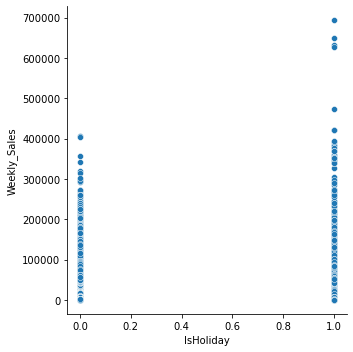

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.relplot(x=num["IsHoliday"], y=Y["Weekly_Sales"] )

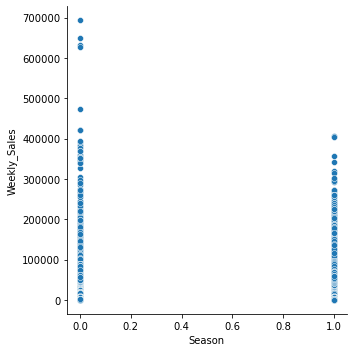

In [62]:
sns.relplot(x=num["Season"], y=Y["Weekly_Sales"] )

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import random

C:\Users\navne\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Model Selection

Random Forest Regressor and XGBoost Regressor are commonly selected for forecasting tasks because of theirs state-of-the-art performance, so they will be evaluated as baseline models.


In [64]:
#Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(num,Y)


ExtraTreesRegressor()

#print(model.feature_importances_ture_importances_)

#Plot graph of feature imp for better visualization
feat_importances = pd.Series(model.feature_importances_, index=num.columns)
feat_importances.nlargest(10).plot(kind='barh')

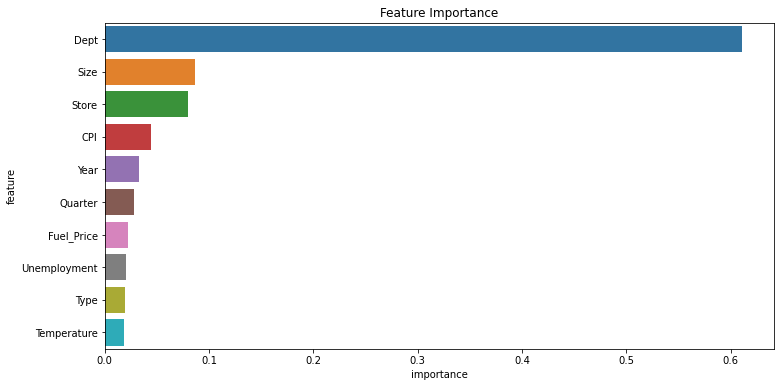

In [65]:
importance_df = pd.DataFrame({'feature': num.columns,'importance':  model.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(12,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [66]:
importance_df

,feature,importance
1,Dept,0.611392
4,Size,0.086686
0,Store,0.080176
11,CPI,0.044428
13,Year,0.032761
14,Quarter,0.027879
6,Fuel_Price,0.022445
12,Unemployment,0.020340
3,Type,0.019661
5,Temperature,0.018209


In [67]:
columns = list(importance_df.feature.head(10).values)
columns.append('IsHoliday')
columns.append('Season')
columns

['Dept',
 'Size',
 'Store',
 'CPI',
 'Year',
 'Quarter',
 'Fuel_Price',
 'Unemployment',
 'Type',
 'Temperature',
 'IsHoliday',
 'Season']

In [68]:
X = num[columns]
y = Y.Weekly_Sales

In [69]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 420285, dtype: float64

In [70]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [71]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (336228, 12)
Shape of Testing Data (84057, 12)
Response Rate in Training Data 16028.513875674176
Response Rate in Testing Data 16037.59336259937


In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.064612,{'normalize': True}
1,lasso,0.064612,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.921240,"{'criterion': 'mse', 'splitter': 'best'}"


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

#Now we will define the type of model we want to build a random forest regression model in this case and initialize the GridSearchCV over this model for the above-defined parameters. 

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#We have defined the estimator to be the random forest regression model param_grid to all the parameters we wanted to check and cross-validation to 3. We will now train this model bypassing the training data and checking for the score on testing data. Use the below code to do the same.

g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 15, random_state = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=1)

In [79]:
# Model Evaluation
y_pred_rf=rf.predict(X_test)

In [81]:
from sklearn import metrics
rf.score(X_test, y_test)

0.9504527960787631